In [1]:
%config InlineBackend.figure_formats = {"retina", "png"}
# %matplotlib notebook

import os
import sys

sys.path.insert(0, os.pardir)
from ibm_100nm.small_susc import small_susc
from sources.sources import vortex, VortexField

import logging
logging.basicConfig(level=logging.INFO)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 14

import superscreen as sc

In [2]:
squid = small_susc()

In [3]:
squid.make_mesh(min_triangles=10000, optimesh_steps=200)

INFO:superscreen.device:Generating mesh...
INFO:superscreen.device:Optimizing mesh with 10866 triangles.
INFO:superscreen.device:Finished generating mesh with 5560 points and 10866 triangles.
INFO:superscreen.device:Calculating weight matrix.
INFO:superscreen.device:Calculating Laplace operator.
INFO:superscreen.device:Calculating kernel matrix.


In [4]:
squid

Device(
    "susceptometer_100nm", 
    layers=[
        Layer("W2", Lambda=0.032, thickness=0.200, london_lambda=0.080, z0=0.100), 
        Layer("W1", Lambda=0.064, thickness=0.100, london_lambda=0.080, z0=0.380), 
        Layer("BE", Lambda=0.040, thickness=0.160, london_lambda=0.080, z0=0.660),
    ], 
    films=[
        Polygon("fc", layer="BE", points=ndarray[shape=(35, 2)]), 
        Polygon("pl_shield2", layer="BE", points=ndarray[shape=(6, 2)]), 
        Polygon("fc_shield", layer="W1", points=ndarray[shape=(10, 2)]), 
        Polygon("pl", layer="W1", points=ndarray[shape=(19, 2)]), 
        Polygon("pl_shield", layer="W2", points=ndarray[shape=(6, 2)]),
    ], 
    holes=[
        Polygon("fc_center", layer="BE", points=ndarray[shape=(37, 2)]),
    ], 
    abstract_regions=[
        Polygon("bounding_box", layer="W1", points=ndarray[shape=(4, 2)]), 
        Polygon("pl_hull", layer="W1", points=ndarray[shape=(12, 2)]),
    ], 
    length_units="um",
)

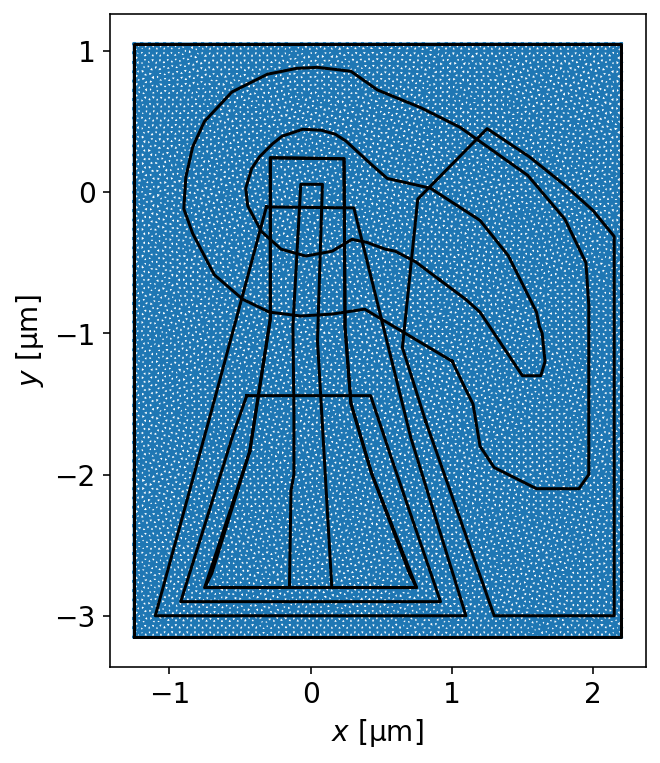

In [5]:
ax = squid.plot_mesh(figsize=(6, 6))
ax = squid.plot_polygons(ax=ax, color="k", legend=False)

In [6]:
sample_height = -0.5

def applied_field_func(x, y, z, x0=None, y0=None, z0=None, nPhi0=1):
    return vortex(x, y, z, x0=x0, y0=y0, z0=z0, nPhi0=nPhi0)

vortex_ys = np.linspace(1, -2.5, 21)

applied_fields = [
    sc.Parameter(applied_field_func, x0=0, y0=y0, z0=sample_height, nPhi0=1)
    for y0 in vortex_ys
]

In [7]:
solutions, _ = sc.solve_many(
    device=squid,
    applied_fields=applied_fields,
    field_units="Phi_0 / um**2",
    coupled=True,
    iterations=5,
    return_solutions=True,
    keep_only_final_solution=True,
)

INFO:superscreen.parallel:Solving 21 models serially with 1 process.
INFO:superscreen.brandt:Calculating W2 response to applied field.
INFO:superscreen.brandt:Calculating W1 response to applied field.
INFO:superscreen.brandt:Calculating BE response to applied field.
INFO:superscreen.brandt:Calculating screening field at W2 from W1 (1/5).
INFO:superscreen.brandt:Calculating screening field at W2 from BE (1/5).
INFO:superscreen.brandt:Calculating screening field at W1 from W2 (1/5).
INFO:superscreen.brandt:Calculating screening field at W1 from BE (1/5).
INFO:superscreen.brandt:Calculating screening field at BE from W2 (1/5).
INFO:superscreen.brandt:Calculating screening field at BE from W1 (1/5).
INFO:superscreen.brandt:Calculating W2 response to applied field and screening field from other layers (1/5).
INFO:superscreen.brandt:Calculating W1 response to applied field and screening field from other layers (1/5).
INFO:superscreen.brandt:Calculating BE response to applied field and screen

INFO:superscreen.brandt:Calculating W1 response to applied field and screening field from other layers (3/5).
INFO:superscreen.brandt:Calculating BE response to applied field and screening field from other layers (3/5).
INFO:superscreen.brandt:Calculating screening field at W2 from W1 (4/5).
INFO:superscreen.brandt:Calculating screening field at W2 from BE (4/5).
INFO:superscreen.brandt:Calculating screening field at W1 from W2 (4/5).
INFO:superscreen.brandt:Calculating screening field at W1 from BE (4/5).
INFO:superscreen.brandt:Calculating screening field at BE from W2 (4/5).
INFO:superscreen.brandt:Calculating screening field at BE from W1 (4/5).
INFO:superscreen.brandt:Calculating W2 response to applied field and screening field from other layers (4/5).
INFO:superscreen.brandt:Calculating W1 response to applied field and screening field from other layers (4/5).
INFO:superscreen.brandt:Calculating BE response to applied field and screening field from other layers (4/5).
INFO:supersc

INFO:superscreen.brandt:Calculating screening field at BE from W1 (1/5).
INFO:superscreen.brandt:Calculating W2 response to applied field and screening field from other layers (1/5).
INFO:superscreen.brandt:Calculating W1 response to applied field and screening field from other layers (1/5).
INFO:superscreen.brandt:Calculating BE response to applied field and screening field from other layers (1/5).
INFO:superscreen.brandt:Calculating screening field at W2 from W1 (2/5).
INFO:superscreen.brandt:Calculating screening field at W2 from BE (2/5).
INFO:superscreen.brandt:Calculating screening field at W1 from W2 (2/5).
INFO:superscreen.brandt:Calculating screening field at W1 from BE (2/5).
INFO:superscreen.brandt:Calculating screening field at BE from W2 (2/5).
INFO:superscreen.brandt:Calculating screening field at BE from W1 (2/5).
INFO:superscreen.brandt:Calculating W2 response to applied field and screening field from other layers (2/5).
INFO:superscreen.brandt:Calculating W1 response t

INFO:superscreen.brandt:Calculating W1 response to applied field and screening field from other layers (5/5).
INFO:superscreen.brandt:Calculating BE response to applied field and screening field from other layers (5/5).
INFO:superscreen.brandt:Calculating W2 response to applied field.
INFO:superscreen.brandt:Calculating W1 response to applied field.
INFO:superscreen.brandt:Calculating BE response to applied field.
INFO:superscreen.brandt:Calculating screening field at W2 from W1 (1/5).
INFO:superscreen.brandt:Calculating screening field at W2 from BE (1/5).
INFO:superscreen.brandt:Calculating screening field at W1 from W2 (1/5).
INFO:superscreen.brandt:Calculating screening field at W1 from BE (1/5).
INFO:superscreen.brandt:Calculating screening field at BE from W2 (1/5).
INFO:superscreen.brandt:Calculating screening field at BE from W1 (1/5).
INFO:superscreen.brandt:Calculating W2 response to applied field and screening field from other layers (1/5).
INFO:superscreen.brandt:Calculatin

INFO:superscreen.brandt:Calculating screening field at BE from W1 (3/5).
INFO:superscreen.brandt:Calculating W2 response to applied field and screening field from other layers (3/5).
INFO:superscreen.brandt:Calculating W1 response to applied field and screening field from other layers (3/5).
INFO:superscreen.brandt:Calculating BE response to applied field and screening field from other layers (3/5).
INFO:superscreen.brandt:Calculating screening field at W2 from W1 (4/5).
INFO:superscreen.brandt:Calculating screening field at W2 from BE (4/5).
INFO:superscreen.brandt:Calculating screening field at W1 from W2 (4/5).
INFO:superscreen.brandt:Calculating screening field at W1 from BE (4/5).
INFO:superscreen.brandt:Calculating screening field at BE from W2 (4/5).
INFO:superscreen.brandt:Calculating screening field at BE from W1 (4/5).
INFO:superscreen.brandt:Calculating W2 response to applied field and screening field from other layers (4/5).
INFO:superscreen.brandt:Calculating W1 response t

INFO:superscreen.brandt:Calculating screening field at W1 from W2 (1/5).
INFO:superscreen.brandt:Calculating screening field at W1 from BE (1/5).
INFO:superscreen.brandt:Calculating screening field at BE from W2 (1/5).
INFO:superscreen.brandt:Calculating screening field at BE from W1 (1/5).
INFO:superscreen.brandt:Calculating W2 response to applied field and screening field from other layers (1/5).
INFO:superscreen.brandt:Calculating W1 response to applied field and screening field from other layers (1/5).
INFO:superscreen.brandt:Calculating BE response to applied field and screening field from other layers (1/5).
INFO:superscreen.brandt:Calculating screening field at W2 from W1 (2/5).
INFO:superscreen.brandt:Calculating screening field at W2 from BE (2/5).
INFO:superscreen.brandt:Calculating screening field at W1 from W2 (2/5).
INFO:superscreen.brandt:Calculating screening field at W1 from BE (2/5).
INFO:superscreen.brandt:Calculating screening field at BE from W2 (2/5).
INFO:superscr

INFO:superscreen.brandt:Calculating screening field at BE from W2 (5/5).
INFO:superscreen.brandt:Calculating screening field at BE from W1 (5/5).
INFO:superscreen.brandt:Calculating W2 response to applied field and screening field from other layers (5/5).
INFO:superscreen.brandt:Calculating W1 response to applied field and screening field from other layers (5/5).
INFO:superscreen.brandt:Calculating BE response to applied field and screening field from other layers (5/5).
INFO:superscreen.brandt:Calculating W2 response to applied field.
INFO:superscreen.brandt:Calculating W1 response to applied field.
INFO:superscreen.brandt:Calculating BE response to applied field.
INFO:superscreen.brandt:Calculating screening field at W2 from W1 (1/5).
INFO:superscreen.brandt:Calculating screening field at W2 from BE (1/5).
INFO:superscreen.brandt:Calculating screening field at W1 from W2 (1/5).
INFO:superscreen.brandt:Calculating screening field at W1 from BE (1/5).
INFO:superscreen.brandt:Calculatin

INFO:superscreen.brandt:Calculating screening field at W2 from BE (3/5).
INFO:superscreen.brandt:Calculating screening field at W1 from W2 (3/5).
INFO:superscreen.brandt:Calculating screening field at W1 from BE (3/5).
INFO:superscreen.brandt:Calculating screening field at BE from W2 (3/5).
INFO:superscreen.brandt:Calculating screening field at BE from W1 (3/5).
INFO:superscreen.brandt:Calculating W2 response to applied field and screening field from other layers (3/5).
INFO:superscreen.brandt:Calculating W1 response to applied field and screening field from other layers (3/5).
INFO:superscreen.brandt:Calculating BE response to applied field and screening field from other layers (3/5).
INFO:superscreen.brandt:Calculating screening field at W2 from W1 (4/5).
INFO:superscreen.brandt:Calculating screening field at W2 from BE (4/5).
INFO:superscreen.brandt:Calculating screening field at W1 from W2 (4/5).
INFO:superscreen.brandt:Calculating screening field at W1 from BE (4/5).
INFO:superscr

INFO:superscreen.brandt:Calculating screening field at W2 from W1 (1/5).
INFO:superscreen.brandt:Calculating screening field at W2 from BE (1/5).
INFO:superscreen.brandt:Calculating screening field at W1 from W2 (1/5).
INFO:superscreen.brandt:Calculating screening field at W1 from BE (1/5).
INFO:superscreen.brandt:Calculating screening field at BE from W2 (1/5).
INFO:superscreen.brandt:Calculating screening field at BE from W1 (1/5).
INFO:superscreen.brandt:Calculating W2 response to applied field and screening field from other layers (1/5).
INFO:superscreen.brandt:Calculating W1 response to applied field and screening field from other layers (1/5).
INFO:superscreen.brandt:Calculating BE response to applied field and screening field from other layers (1/5).
INFO:superscreen.brandt:Calculating screening field at W2 from W1 (2/5).
INFO:superscreen.brandt:Calculating screening field at W2 from BE (2/5).
INFO:superscreen.brandt:Calculating screening field at W1 from W2 (2/5).
INFO:superscr

INFO:superscreen.brandt:Calculating screening field at W1 from W2 (5/5).
INFO:superscreen.brandt:Calculating screening field at W1 from BE (5/5).
INFO:superscreen.brandt:Calculating screening field at BE from W2 (5/5).
INFO:superscreen.brandt:Calculating screening field at BE from W1 (5/5).
INFO:superscreen.brandt:Calculating W2 response to applied field and screening field from other layers (5/5).
INFO:superscreen.brandt:Calculating W1 response to applied field and screening field from other layers (5/5).
INFO:superscreen.brandt:Calculating BE response to applied field and screening field from other layers (5/5).
INFO:superscreen.brandt:Calculating W2 response to applied field.
INFO:superscreen.brandt:Calculating W1 response to applied field.
INFO:superscreen.brandt:Calculating BE response to applied field.
INFO:superscreen.brandt:Calculating screening field at W2 from W1 (1/5).
INFO:superscreen.brandt:Calculating screening field at W2 from BE (1/5).
INFO:superscreen.brandt:Calculatin

INFO:superscreen.brandt:Calculating screening field at W2 from W1 (3/5).
INFO:superscreen.brandt:Calculating screening field at W2 from BE (3/5).
INFO:superscreen.brandt:Calculating screening field at W1 from W2 (3/5).
INFO:superscreen.brandt:Calculating screening field at W1 from BE (3/5).
INFO:superscreen.brandt:Calculating screening field at BE from W2 (3/5).
INFO:superscreen.brandt:Calculating screening field at BE from W1 (3/5).
INFO:superscreen.brandt:Calculating W2 response to applied field and screening field from other layers (3/5).
INFO:superscreen.brandt:Calculating W1 response to applied field and screening field from other layers (3/5).
INFO:superscreen.brandt:Calculating BE response to applied field and screening field from other layers (3/5).
INFO:superscreen.brandt:Calculating screening field at W2 from W1 (4/5).
INFO:superscreen.brandt:Calculating screening field at W2 from BE (4/5).
INFO:superscreen.brandt:Calculating screening field at W1 from W2 (4/5).
INFO:superscr

INFO:superscreen.brandt:Calculating screening field at W2 from W1 (1/5).
INFO:superscreen.brandt:Calculating screening field at W2 from BE (1/5).
INFO:superscreen.brandt:Calculating screening field at W1 from W2 (1/5).
INFO:superscreen.brandt:Calculating screening field at W1 from BE (1/5).
INFO:superscreen.brandt:Calculating screening field at BE from W2 (1/5).
INFO:superscreen.brandt:Calculating screening field at BE from W1 (1/5).
INFO:superscreen.brandt:Calculating W2 response to applied field and screening field from other layers (1/5).
INFO:superscreen.brandt:Calculating W1 response to applied field and screening field from other layers (1/5).
INFO:superscreen.brandt:Calculating BE response to applied field and screening field from other layers (1/5).
INFO:superscreen.brandt:Calculating screening field at W2 from W1 (2/5).
INFO:superscreen.brandt:Calculating screening field at W2 from BE (2/5).
INFO:superscreen.brandt:Calculating screening field at W1 from W2 (2/5).
INFO:superscr

INFO:superscreen.brandt:Calculating screening field at W1 from W2 (5/5).
INFO:superscreen.brandt:Calculating screening field at W1 from BE (5/5).
INFO:superscreen.brandt:Calculating screening field at BE from W2 (5/5).
INFO:superscreen.brandt:Calculating screening field at BE from W1 (5/5).
INFO:superscreen.brandt:Calculating W2 response to applied field and screening field from other layers (5/5).
INFO:superscreen.brandt:Calculating W1 response to applied field and screening field from other layers (5/5).
INFO:superscreen.brandt:Calculating BE response to applied field and screening field from other layers (5/5).
INFO:superscreen.brandt:Calculating W2 response to applied field.
INFO:superscreen.brandt:Calculating W1 response to applied field.
INFO:superscreen.brandt:Calculating BE response to applied field.
INFO:superscreen.brandt:Calculating screening field at W2 from W1 (1/5).
INFO:superscreen.brandt:Calculating screening field at W2 from BE (1/5).
INFO:superscreen.brandt:Calculatin

In [8]:
records = [s.polygon_flux(units="Phi_0", with_units=False) for s in solutions]

In [9]:
df = pd.DataFrame.from_records(records)
df["y0"] = vortex_ys
df = df.set_index("y0")

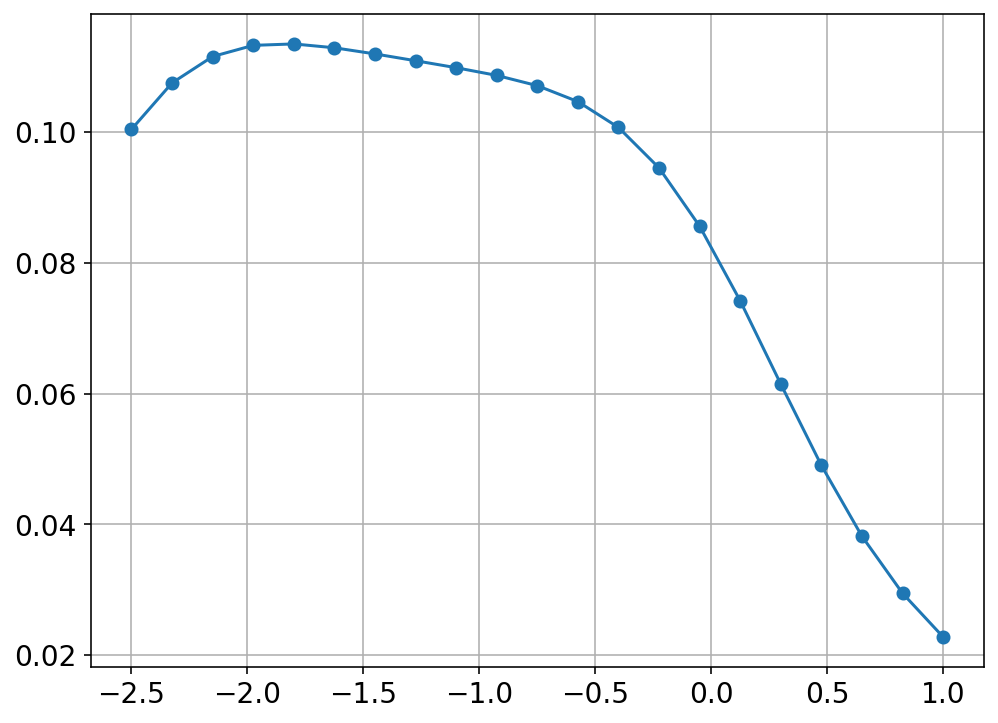

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(True)
ax.plot(df.index.values, df.pl_hull.values, "o-")

In [ ]:
fig, axes = solutions[10].plot_fields(figsize=(16, 6), max_cols=4)
for ax in axes:
    ax = squid.plot_polygons(ax, color="w", legend=False, lw=0.5)

In [ ]:
fig, axes = solutions[10].plot_currents(figsize=(16, 6), max_cols=4)
for ax in axes:
    ax = squid.plot_polygons(ax, color="w", legend=False, lw=0.5)

In [ ]:
fig, axes = solutions[-2].plot_currents(figsize=(16, 6), max_cols=4)

In [ ]:
sample_height = -0.5

vortex_ys = np.linspace(1, -2.5, 21)

applied_fields = [VortexField(x0=0, y0=y0, z0=0) for y0 in vortex_ys]

solutions, _ = sc.solve_many(
    device=squid,
    applied_fields=applied_fields,
    field_units="Phi_0 / um**2",
    coupled=False,
    return_solutions=True,
    keep_only_final_solution=True,
)

In [ ]:
records = [s.polygon_flux(units="Phi_0", with_units=False) for s in solutions]
df = pd.DataFrame.from_records(records)
df["y0"] = vortex_ys
df = df.set_index("y0")

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(True)
ax.plot(df.index.values, df.pl_hull.values, "o-")

In [ ]:
squid